In [13]:
import sys
sys.path.append('..')

In [14]:
from flamingchoripan.myUtils.files import search_for_filedirs
from src import C_

root_folder = 'save'
filedirs = search_for_filedirs(root_folder, fext=C_.EXT_RAW_LIGHTCURVE)

────────────────────────────────────────────────────────────────────────────────────────────────────
found filedirs: (save)
(0) - save/PLAsTiCCv1/survey-PLAsTiCCv1_bands-gr_mode-onlySN.rawlcd - 4.299[mbs]
(1) - save/alerceZTFv5.1/survey-alerceZTFv5.1_bands-gr_mode-onlySNe.rawlcd - 0.931[mbs]
(2) - save/alerceZTFv5.1/survey-alerceZTFv5.1_bands-gr_mode-onlySNIa.rawlcd - 0.931[mbs]
(3) - save/FakeSNe/survey-FakeSNe_bands-gr_classes-3.rawlcd - 1.209[mbs]
────────────────────────────────────────────────────────────────────────────────────────────────────
filedirs after searching with filters: (save)
(0) - save/PLAsTiCCv1/survey-PLAsTiCCv1_bands-gr_mode-onlySN.rawlcd - 4.299[mbs]
(1) - save/alerceZTFv5.1/survey-alerceZTFv5.1_bands-gr_mode-onlySNe.rawlcd - 0.931[mbs]
(2) - save/alerceZTFv5.1/survey-alerceZTFv5.1_bands-gr_mode-onlySNIa.rawlcd - 0.931[mbs]
(3) - save/FakeSNe/survey-FakeSNe_bands-gr_classes-3.rawlcd - 1.209[mbs]
───────────────────────────────────────────────────────────────────

In [18]:
%load_ext autoreload
%autoreload 2
import numpy as np
from flamingchoripan.myUtils.progress_bars import ProgressBar
from flamingchoripan.myUtils.files import load_pickle, save_pickle
from flamingchoripan.myUtils.files import get_dict_from_filedir
from src import C_

def load_lcdataset(filedir):
    assert filedir.split('.')[-1]==C_.EXT_RAW_LIGHTCURVE
    return load_pickle(filedir)

filedir = 'save/PLAsTiCCv1/survey-PLAsTiCCv1_bands-gr_mode-onlySN.rawlcd'
filedir = 'save/alerceZTFv5.1/survey-alerceZTFv5.1_bands-gr_mode-onlySNe.rawlcd'
#filedir = 'save/alerceZTFv5.1/survey-alerceZTFv5.1_bands-gr_mode-onlySNIa.rawlcd'
#filedir = 'save/FakeSNe/survey-FakeSNe_bands-gr_classes-3.rawlcd'

filedic = get_dict_from_filedir(filedir)
root_folder = filedic['*rootdir*']
cfilename = filedic['*cfilename*']
lcdataset = load_lcdataset(filedir)
print(lcdataset.raw.keys())
print(lcdataset.raw.get_random_lcobj(False).keys())
print(lcdataset)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
> loading: save/alerceZTFv5.1/survey-alerceZTFv5.1_bands-gr_mode-onlySNe.rawlcd
dict_keys(['data', 'survey', 'description', 'band_names', 'class_names', 'obs_is_flux'])
dict_keys(['days', 'obs', 'obse', 'y'])
LCDataset():
(raw) - samples: 1,099 - obs samples: 30,346 (g: 12,540 - r: 17,806) - max_length_serial: 205 - max_duration: 578.23
(train) - -
(val) - -
(test) - -
(raw_train) - -
(raw_val) - -
(raw_test) - -



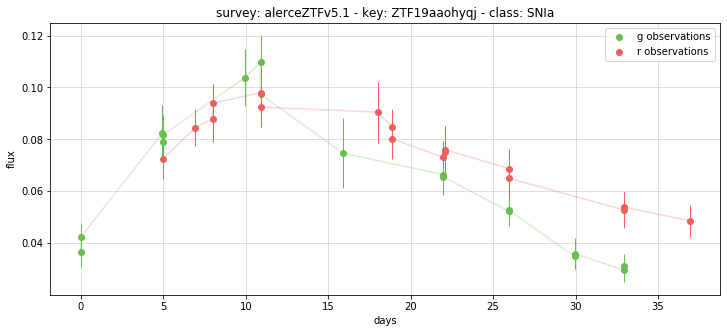

In [19]:
import flamingchoripan.myUtils.lists as lists
import matplotlib.pyplot as plt
from src.plots import plot_lightcurve

lcset = lcdataset.raw
lcobj, key = lcset.get_random_lcobj()
fig, ax = plt.subplots(1,1, figsize=(12,5))
for kb,b in enumerate(lcset.band_names):
    plot_lightcurve(ax, lcobj, b, label=f'{b} observations')
ax.set_title(f'survey: {lcset.survey} - key: {key} - class: {lcset.class_names[lcobj.y]}')
ax.set_xlabel('days')
ax.set_ylabel('flux')
ax.legend()
ax.grid(alpha=0.5)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
dataset


[]

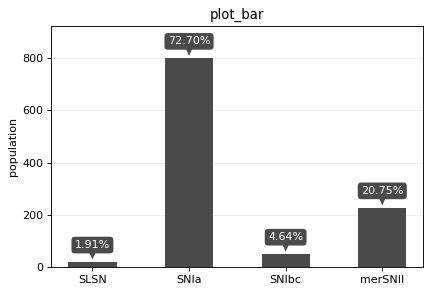

In [20]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import flamingchoripan.cutePlots.plots as cplots
import flamingchoripan.cutePlots.colors as cc

labels = lcdataset.raw.get_lcobj_classes()
cmap = cc.colorlist_to_cmap([cc.NICE_COLORS_DICT['nice_gray']])
fig, ax = cplots.plot_hist_labels(labels, lcdataset.raw.class_names, cmap=cmap)
plt.plot()

In [21]:
%load_ext autoreload
%autoreload 2
from src.splits import split_lcdataset

split_lcdataset(lcdataset, train_size=0.8)
print(lcdataset)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
LCDataset():
(raw) - samples: 1,099 - obs samples: 30,346 (g: 12,540 - r: 17,806) - max_length_serial: 205 - max_duration: 578.23
(train) - -
(val) - -
(test) - -
(raw_train) - samples: 877 - obs samples: 23,443 (g: 9,565 - r: 13,878) - max_length_serial: 199 - max_duration: 578.23
(raw_val) - samples: 222 - obs samples: 6,903 (g: 2,975 - r: 3,928) - max_length_serial: 205 - max_duration: 189.70
(raw_test) - -



In [22]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from src.sigma_clipping import sigma_clipping

sigma_clipping_kwargs = {
    'sigma_n':5,
    'sigma_m':3,
    'apply_lower_bound':False,
    'verbose':0,
}
for ks,set_name in enumerate(['raw_train', 'raw_val']):
    deleted_points = sigma_clipping(lcdataset, set_name, **sigma_clipping_kwargs)

print(lcdataset)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
survey: alerceZTFv5.1 - after processing: raw_train (>train)
deleted keys: 6
sigma_samples: 12,873 - total_deleted_points: {'g': 656, 'r': 1001}
survey: alerceZTFv5.1 - after processing: raw_val (>val)
deleted keys: 0
sigma_samples: 3,751 - total_deleted_points: {'g': 111, 'r': 177}
LCDataset():
(raw) - samples: 1,099 - obs samples: 30,346 (g: 12,540 - r: 17,806) - max_length_serial: 205 - max_duration: 578.23
(train) - samples: 871 - obs samples: 21,780 (g: 8,907 - r: 12,873) - max_length_serial: 198 - max_duration: 578.23
(val) - samples: 222 - obs samples: 6,615 (g: 2,864 - r: 3,751) - max_length_serial: 204 - max_duration: 189.70
(test) - -
(raw_train) - samples: 877 - obs samples: 23,443 (g: 9,565 - r: 13,878) - max_length_serial: 199 - max_duration: 578.23
(raw_val) - samples: 222 - obs samples: 6,903 (g: 2,975 - r: 3,928) - max_length_serial: 205 - max_duration: 189.70
(raw_test) - -



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


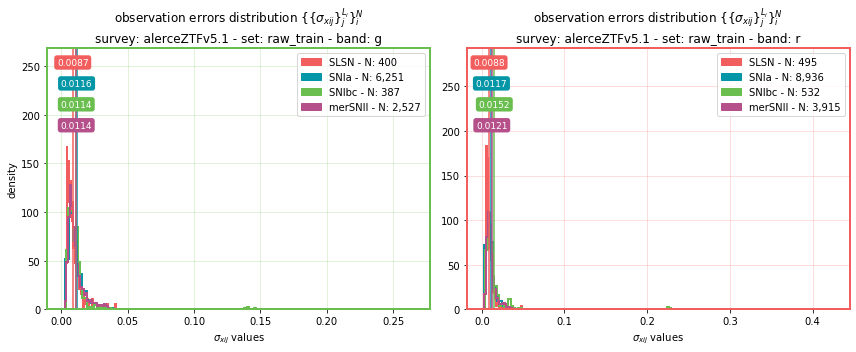

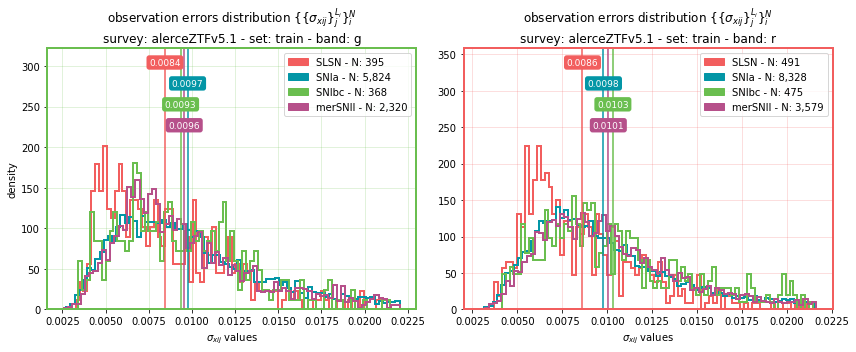

In [23]:
%load_ext autoreload
%autoreload 2
from src.plots import plot_sigma_distribution

plot_sigma_distribution(lcdataset, 'raw_train')
plot_sigma_distribution(lcdataset, 'train')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


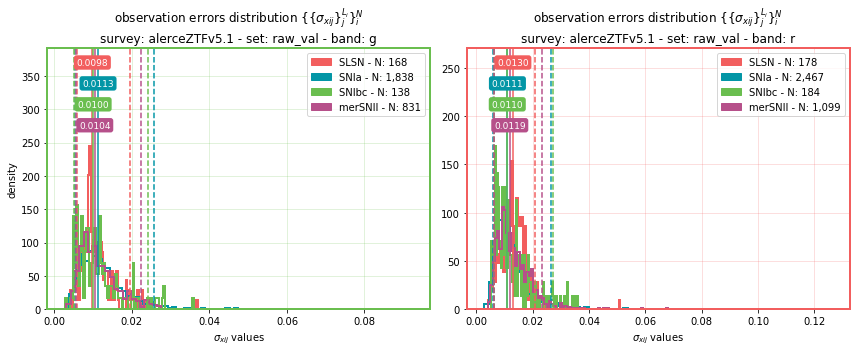

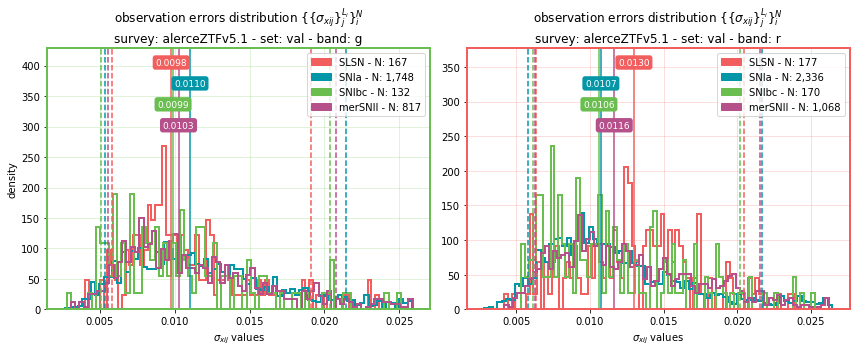

In [28]:
%load_ext autoreload
%autoreload 2
from src.plots import plot_sigma_distribution

plot_sigma_distribution(lcdataset, 'raw_val')
plot_sigma_distribution(lcdataset, 'val')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
class samples
class samples


[]

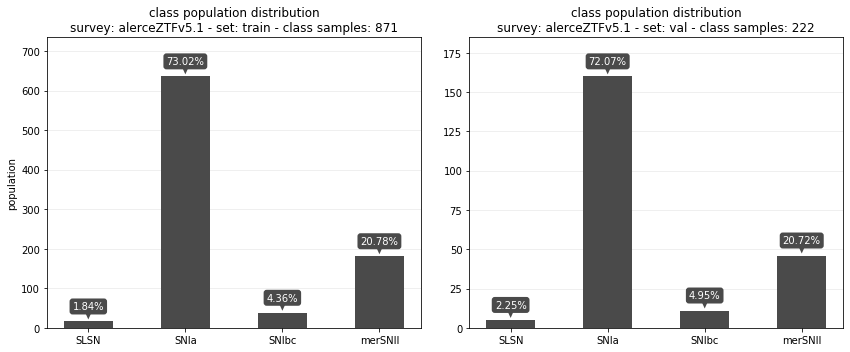

In [25]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import flamingchoripan.cutePlots.colors as cc

figsize = (12,5)
fig, axs = plt.subplots(1, 2, figsize=figsize)
for ks,set_name in enumerate(['train', 'val']):
    ax = axs[ks]
    lcset = lcdataset.get(set_name)
    lcobj_classes = lcset.get_lcobj_classes()
    to_plot = {'class samples':lcobj_classes}
    title = 'class population distribution\n'
    title += f'survey: {lcset.survey} - set: {set_name} - class samples: {len(lcobj_classes):,}'
    plt_kwargs = {
        'fig':fig,
        'ax':ax,
        'ylabel':'' if ks>0 else None,
        'legend_ncol':len(lcset.band_names),
        'title':title,
        'cmap':cc.colorlist_to_cmap([cc.NICE_COLORS_DICT['nice_gray']]),
        'uses_log_scale':0,
    }
    fig, ax = cplots.plot_hist_labels(to_plot, lcset.class_names, **plt_kwargs)
    
fig.tight_layout()
plt.plot()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[]

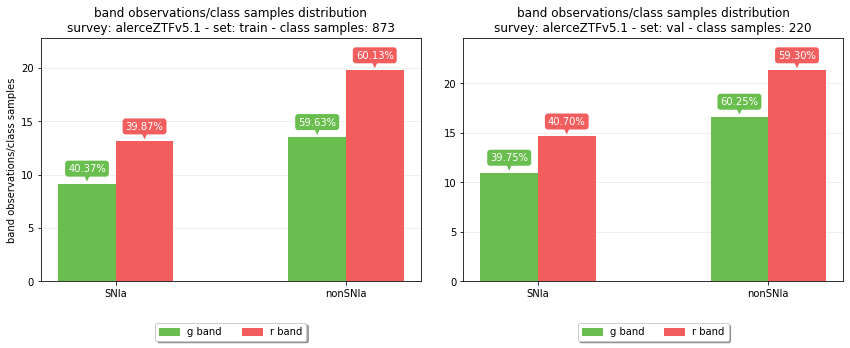

In [11]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import flamingchoripan.cutePlots.colors as cc

figsize = (12,5)
fig, axs = plt.subplots(1, 2, figsize=figsize)
for ks,set_name in enumerate(['train', 'val']):
    ax = axs[ks]
    lcset = lcdataset.get(set_name)
    lcobj_classes = lcset.get_lcobj_classes()
    to_plot = {c:{f'{b} band':lcset.get_lcobj_obsmean_classes_b(b)[c] for b in lcset.band_names} for c in lcset.class_names}
    title = 'band observations/class samples distribution\n'
    title += f'survey: {lcset.survey} - set: {set_name} - class samples: {len(lcobj_classes):,}'
    plt_kwargs = {
        'fig':fig,
        'ax':ax,
        'ylabel':'' if ks>0 else 'band observations/class samples',
        'legend_ncol':len(lcset.band_names),
        'title':title,
        'cmap':cc.colorlist_to_cmap([C_.COLOR_DICT[b] for b in lcset.band_names]),
        'add_percent_annotations':True,
    }
    fig, ax = cplots.plot_bar(to_plot, [f'{b} band' for b in lcset.band_names], **plt_kwargs)
    
fig.tight_layout()
plt.plot()

In [12]:
from flamingchoripan.myUtils.files import load_pickle, save_pickle
from src import C_

kfid = 0
new_cfilename = f'{cfilename}_kfid-{kfid}'
save_filedir = f'{root_folder}/{new_cfilename}.{C_.EXT_SPLIT_LIGHTCURVE}'
save_pickle(save_filedir, lcdataset)

> saving: save/alerceZTFv5.1/survey-alerceZTFv5.1_bands-gr_mode-onlySNIa_kfid-0.slcd


'save/alerceZTFv5.1/survey-alerceZTFv5.1_bands-gr_mode-onlySNIa_kfid-0.slcd'